## 차원축소
1. 2,3차원으로 변환해 시각화하면 직관적 데이터 분석 가능
2. 노이즈(잡음) 제거
3. 차원의 저주 curse of dimensionality 문제 완화

### 단점
1. 차원 축소로 학습 속도는 빨라지지만, 성능 감소 우려
2. 원본 데이터로 학습 진행 후 학습속도 측정 후 축소 선택

### 축소 기법
1. 피쳐 선택 feature selection
2. 피쳐 추출 feature extraction

### 학습 모델
- 선형
    - PCA (Principal Component Analysis) 주성분 분석
    - LDA (Linear Discriminant Analysis) 선형판별분석법
    - SVD (Singular Value Decomposition) 특이값 분해
    - NMF (Non-negative Matrix Factorization) 비음수 행렬 분해
- 비선형
    - AE (Autoencoder)오토인코더
    - t-SNE (Stochastic Neighbor Embedding) t-분포확률적 임베딩
    - Isomap 
    - LLE (Locally Linear Embedding)지역선형 임베딩

### 방법
1. 투영(Projection) -> 스위트롤 같은 경우는 축소가 불가
2. 매니폴드(Manifold) 학습 -> 고차원데이터에서 매니폴드(부분공간)을 찾는 것

### 비지도 학습 unsupervised learning
- 정답(타겟, 레이블)이 없는 데이터 학습
- 지도학습에서 적합한 특성을 찾기 위한 전처리 방법으로 이용

- 종류 
    - 차원축소 
    - 군집화 clustering
    - 밀도추정 density estimation
    - 이상치 탐지 outlier

### 주성분분석 PCA
- 공분산행렬을 대각화해서 특정 개수의 고유값만 뽑는다.
- 종류
    - Random PCA
    - Incremental PCA -> partial_fit() 으로 학습
    - Kernel PCA -> 복잡한 비선형 투영을 수행하기 위한 PCA
        - fit_inverse_transform 파라미터 지정


### 주성분분석 실습
- fit() + transform() 2단계 걸쳐서 주성분 분석
- PCA() 
    - n_components = 0.0 ~ 1.0 : 주성분 투영된 데이터 분포 정도 지정하면 PC차원수 자동 계산
    - n_components = int : 주성분 개수로 계산
    - explained_variance_ratio_을 바탕으로 누적값에서 원하는 분포 정도 지정해서 PC차원수 자동 계산

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications import VGG16
from keras.utils import plot_model # 모델 플롯 그리기
from keras.utils import set_random_seed # 랜덤 시드 설정
from keras.models import save_model, load_model # 모델 저장 및 로드
from PIL import Image  # 이미지 처리

In [13]:
from sklearn.datasets import load_iris
data, target = load_iris(as_frame=True, return_X_y=True)
feature_name = data.columns 

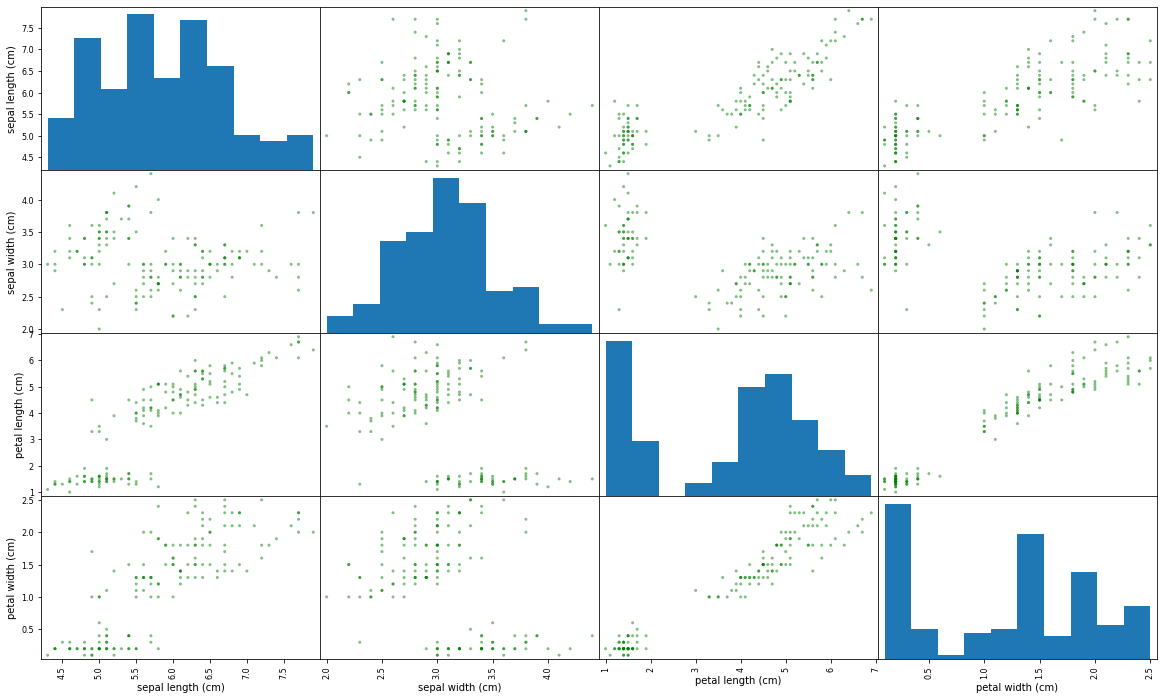

In [21]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(20,12), color='green')
plt.show()

In [30]:
target_1 = data[target == 0]
target_2 = data[target == 1]
target_3 = data[target == 2]

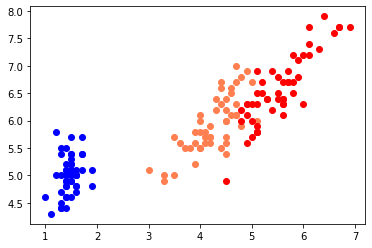

In [31]:
plt.scatter(target_1['petal length (cm)'], target_1['sepal length (cm)'], c='blue')
plt.scatter(target_2['petal length (cm)'], target_2['sepal length (cm)'], c='coral')
plt.scatter(target_3['petal length (cm)'], target_3['sepal length (cm)'], c='red')
plt.show()

In [32]:
data = np.array(data)
target = np.array(target)

sc = StandardScaler()
sc.fit(data)
data = sc.transform(data)

### n_components 파라미터 결정 방법1

In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9) # n_components: int -> 개수, 0~1 사이 float -> 비율
pca.fit(data)
data_pca = pca.transform(data)
data_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [40]:
# singular values
print(pca.singular_values_)

# 주성분에 투영 후 분산 정도 설명
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[20.92306556 11.7091661   4.69185798  1.76273239]
[2.93808505 0.9201649  0.14774182 0.02085386]
[0.72962445 0.22850762 0.03668922 0.00517871]


### n_components 파라미터 결정 방법2

In [60]:

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>0.95)+1

print(f"주성분 개수(차원): {d}")

주성분 개수(차원): 2


In [54]:
pca = PCA(n_components=d)
pca.fit(data)
data_pca = pca.transform(data)

In [55]:
data_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

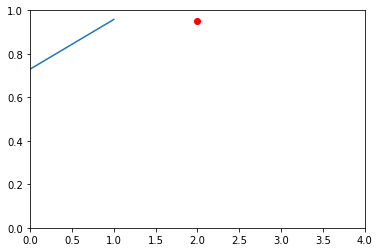

In [62]:
plt.plot(cumsum)
plt.plot(d, 0.95, 'ro')
plt.axis([0,4, 0, 1])
plt.show()

In [66]:
df_pca = pd.DataFrame(data_pca, columns=['pca_1', 'pca_2'])
df_pca.head()

,pca_1,pca_2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [71]:
df = pd.concat([df_pca, pd.DataFrame(target)], axis=1)

In [72]:
target_1 = df[target == 0]
target_2 = df[target == 1]
target_3 = df[target == 2]

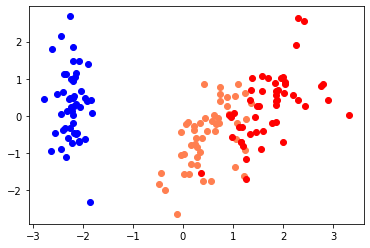

In [73]:
plt.scatter(target_1['pca_1'], target_1['pca_2'], c='blue')
plt.scatter(target_2['pca_1'], target_2['pca_2'], c='coral')
plt.scatter(target_3['pca_1'], target_3['pca_2'], c='red')
plt.show()

### 차원축소한 데이터 원상복구 시키기

In [79]:
re = pca.inverse_transform(data_pca)
re[:5]

array([[-0.99888895,  1.05319838, -1.30270654, -1.24709825],
       [-1.33874781, -0.06192302, -1.22432772, -1.22057235],
       [-1.36096129,  0.32111685, -1.38060338, -1.35833824],
       [-1.42359795,  0.0677615 , -1.34922386, -1.33881298],
       [-1.00113823,  1.24091818, -1.37125365, -1.30661752]])